In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
data = pd.read_csv(url)

In [4]:
data = data.drop(columns=['Unnamed: 0'])

In [6]:
if data.isnull().any().any():
    data = data.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


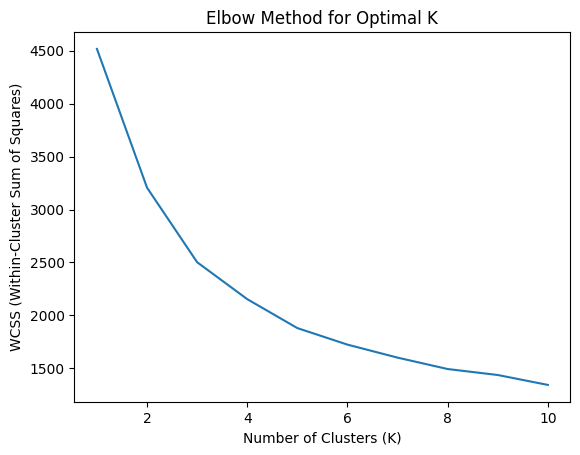

       Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price  Cluster
0  1177.698      2           7        2            2         2  62000        2
1  2134.800      5           7        4            2         2  78000        2
2  1138.560      5           7        2            2         1  58000        1
3  1458.780      2           7        3            2         2  45000        2
4   967.776     11          14        3            2         2  45000        2


In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, choose an optimal value for K
optimal_k = 3  

# Perform K-Means Clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster assignments to the original dataset
data['Cluster'] = cluster_labels

# View the updated dataset with cluster assignments
print(data.head())